<a href="https://colab.research.google.com/github/MashaKubyshina/Learning_to_code/blob/master/Statistics_Basics_Two_Factor_Dispersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

In [55]:
# Main question: Is any of the individual parameters or combined make the results between 4 groups statistically significant?
# We have results from 4 tests Young-Low_dosis, Young-High_dosis, Old-Low_dosis, Old-High_dosis (see data link below)
# Our Zero hypothesis (H-zero) is that the results between groups are not statistically significant
# For H-zero to be true F has to be very small (close to 0) and P > 0.05
# A statistically significant test result (P ≤ 0.05) means that the Zerp hypothesis is false or should be rejected
# For the results to be statistically significant F has to be not too small, definetly not close to 0 and P < 0.05
# (P > 0.05 is the probability that the null hypothesis is true)

# Process followed:

# 1. Import libraries
# 2. Import and read dataset
# 3. Clean dataset
# 4. Do EDA (exploratory data analysis) to see the data
# 5. Find F and P
# 6. Conclusion

In [56]:
# 1. Import libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import scipy.stats as stats

# Import and Read Dataset

In [75]:
# 2. Import and read dataset

url = 'https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv'

df = pd.read_csv(url, header=None, sep=',')

In [76]:
df

,0,1,2
0,expr,age,dose
1,107.351478054914,1,D1
2,104.504438134304,1,D1
3,103.435134210494,1,D1
4,109.572882092261,1,D1
...,...,...,...
60,101.851582089502,2,D2
61,105.239530154673,2,D2
62,99.3501976897502,2,D2
63,108.091455147545,2,D2


In [77]:
df.columns

Int64Index([0, 1, 2], dtype='int64')

# Clean Dataset

In [78]:
# 3. Clean dataset

# We need to clean the data: drop the first row and move column labels to header

# We set the column labels to equal the values in the 1st row (index location 0):

df.columns  = df.iloc[0]

df

,expr,age,dose
0,expr,age,dose
1,107.351478054914,1,D1
2,104.504438134304,1,D1
3,103.435134210494,1,D1
4,109.572882092261,1,D1
...,...,...,...
60,101.851582089502,2,D2
61,105.239530154673,2,D2
62,99.3501976897502,2,D2
63,108.091455147545,2,D2


In [79]:
# Then we drop the 1st row using iloc
# We will save the new dataset as df_cleaned and will use this dataset from the rest of the operations

df_cleaned=df.iloc[pd.RangeIndex(len(df)).drop(0)]
df_cleaned

,expr,age,dose
1,107.351478054914,1,D1
2,104.504438134304,1,D1
3,103.435134210494,1,D1
4,109.572882092261,1,D1
5,114.99380251712,1,D1
...,...,...,...
60,101.851582089502,2,D2
61,105.239530154673,2,D2
62,99.3501976897502,2,D2
63,108.091455147545,2,D2


In [80]:
df_cleaned.columns

Index(['expr', 'age', 'dose'], dtype='object', name=0)

In [81]:
df_cleaned.head

<bound method NDFrame.head of 0               expr age dose
1   107.351478054914   1   D1
2   104.504438134304   1   D1
3   103.435134210494   1   D1
4   109.572882092261   1   D1
5    114.99380251712   1   D1
..               ...  ..  ...
60  101.851582089502   2   D2
61  105.239530154673   2   D2
62  99.3501976897502   2   D2
63  108.091455147545   2   D2
64  111.639128974569   2   D2

[64 rows x 3 columns]>

In [82]:
df_cleaned.shape

(64, 3)

In [83]:
# We convert the 'expr' column to numeric:

df_cleaned.expr = pd.to_numeric(df_cleaned['expr'],errors='coerce')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# EDA (exploratory data analysis)

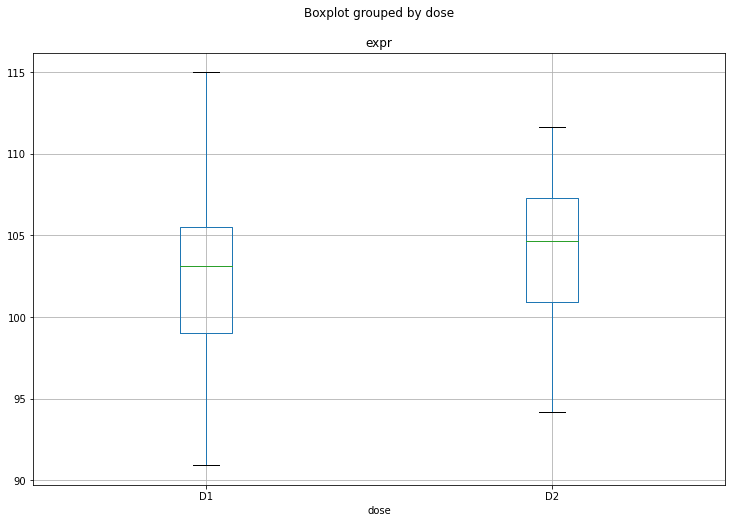

In [84]:
# 4. Do EDA (exploratory data analysis) to see the data

# Let's explore data looking at boxplot by dose
# We can see the overlap of medians and boxes

df_cleaned.boxplot('expr', by='dose', figsize=(12,8), grid=True)

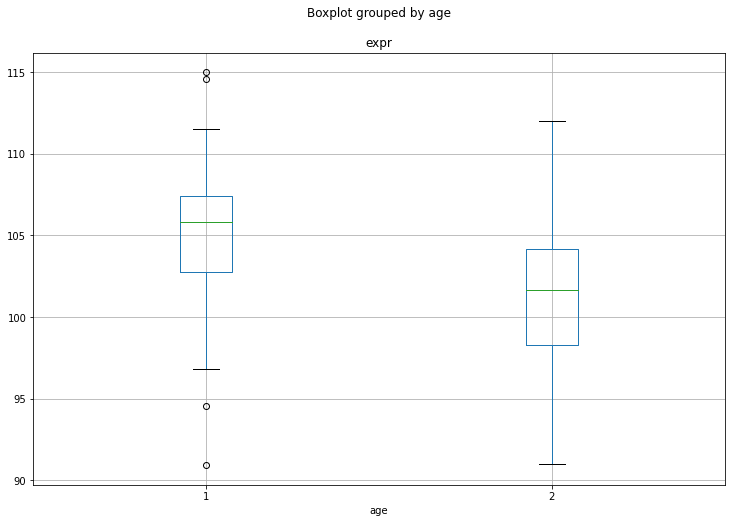

In [93]:
# 4. Do EDA (exploratory data analysis) to see the data

# Let's explore data looking at boxplot by age
# In this case there is a bit more difference and the median of each group is outside the box of the other group

df_cleaned.boxplot('expr', by='age', figsize=(12,8), grid=True)

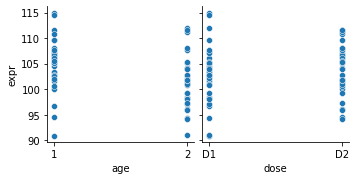

In [86]:
# another view is via pairplot (not too useful here)

import seaborn as sns

sns.pairplot(df_cleaned, y_vars="expr", x_vars=['age','dose'])

# Find F and P

In [113]:
# Create subsets combining multiple conditions

G1_A1_D1 = df_cleaned[(df_cleaned['age'] == '1') & (df_cleaned['dose'] == 'D1')]
G2_A1_D2 = df_cleaned[(df_cleaned['age'] == '1') & (df_cleaned['dose'] == 'D2')]
G3_A2_D1 = df_cleaned[(df_cleaned['age'] == '2') & (df_cleaned['dose'] == 'D1')]
G4_A2_D2 = df_cleaned[(df_cleaned['age'] == '2') & (df_cleaned['dose'] == 'D2')]

# Test
G3_A2_D1

,expr,age,dose
17,101.062276,2,D1
18,100.763332,2,D1
19,94.290992,2,D1
20,90.970949,2,D1
21,105.030672,2,D1
22,98.455295,2,D1
23,97.030269,2,D1
24,104.207160,2,D1
25,102.128773,2,D1
26,98.293741,2,D1


In [114]:
# 5. Find F and P

# Explore different F and P

# Having P > 0.05 and F over 2, tells us that when compared all 4 gouprs there is no stat. sign., but the results are "on the border"
# With F over 2 we would want to look at each group separetly to understand if there is anything interesting


# F and P for all groups (p value is "on the border", P > 0.05, however by very little)

Age1_D1 = df_cleaned[(df_cleaned['age'] == '1') & (df_cleaned['dose'] == 'D1')]["expr"]
Age1_D2 = df_cleaned[(df_cleaned['age'] == '1') & (df_cleaned['dose'] == 'D2')]["expr"]
Age2_D1 = df_cleaned[(df_cleaned['age'] == '2') & (df_cleaned['dose'] == 'D1')]["expr"]
Age2_D2 = df_cleaned[(df_cleaned['age'] == '2') & (df_cleaned['dose'] == 'D2')]["expr"]
print("Results for all 4 groups", stats.f_oneway(Age1_D1, Age1_D2, Age2_D1, Age2_D2))


Results for all groups F_onewayResult(statistic=2.7076380068278114, pvalue=0.053097105673345885)


In [105]:
# F and P for Age 1, D1

age1 = df_cleaned[df_cleaned['age']=='1']["expr"]
dose1 = df_cleaned[df_cleaned['dose']=='D1']["expr"]
stats.f_oneway(age1, dose1)

F_onewayResult(statistic=2.797539610439119, pvalue=0.09944849951092954)

In [106]:
# F and P for Age 2, D1

age2 = df_cleaned[df_cleaned['age']=='2']["expr"]
dose1 = df_cleaned[df_cleaned['dose']=='D1']["expr"]
stats.f_oneway(age2, dose1)

F_onewayResult(statistic=0.840340590984628, pvalue=0.36285146466060136)

In [107]:
# F and P for Age 1, D2

age1 = df_cleaned[df_cleaned['age']=='1']["expr"]
dose2 = df_cleaned[df_cleaned['dose']=='D2']["expr"]
stats.f_oneway(age1, dose2)

F_onewayResult(statistic=0.972499113862926, pvalue=0.3278906294824979)

In [120]:
# F and P for Age 2, D2

age2 = df_cleaned[df_cleaned['age']=='2']["expr"]
dose2 = df_cleaned[df_cleaned['dose']=='D2']["expr"]
stats.f_oneway(age2, dose2)

F_onewayResult(statistic=3.260112705710404, pvalue=0.0758394699711344)

In [121]:
# F and P for Age 1, Age 2

# Here is where we see the most intersting results
# P < 0.05 and F is large (>7), this means that the groups split by age yield stat. sign. results

age1 = df_cleaned[df_cleaned['age']=='1']["expr"]
age2 = df_cleaned[df_cleaned['age']=='2']["expr"]
stats.f_oneway(age1, age2)

F_onewayResult(statistic=7.612770077046995, pvalue=0.007608712054113158)

In [122]:
# F and P for Dose 1 and Dose 2

# In this case we can see that P > 0.05 and F is close to 0
# In case of splitting by dose the Zero-H is true

stats.f_oneway(dose1, dose2)

F_onewayResult(statistic=0.5862334097242068, pvalue=0.44678441580203143)

In [111]:
# F and P values, the sum_sq, mean_sq and df using anova
# Here we are using age+dose 
# source https://www.statsmodels.org/devel/generated/statsmodels.stats.anova.anova_lm.html

# import these libraires
import statsmodels.api as sm
from statsmodels.formula.api import ols

expr_lm = ols('expr ~ age+dose',data=df_cleaned).fit()
table = sm.stats.anova_lm(expr_lm, type=2) # Type 2 Anova DataFrame
print(table)

# sum_sq for Thearpy is SSB (=total sum of squares between groups)
# mean_sq for Therapy is SSB/df
# df for Therapy is degrees of freedom between groups 
# sum_sq for Residual is SSW (=total sum of squares within groups)
# mean_sq for Residual is SSW/df
# df for Residual is degrees of freedom within groups

            df       sum_sq     mean_sq         F    PR(>F)
age        1.0   197.452754  197.452754  7.569592  0.007804
dose       1.0    16.912241   16.912241  0.648351  0.423830
Residual  61.0  1591.184501   26.084992       NaN       NaN


In [112]:
# F and P values, the sum_sq, mean_sq and df using anova
# Here we are using age*dose, to also see this as a combined parameter
# The Residual becomes 60, from 61 because we introduce this another group

# source https://www.statsmodels.org/devel/generated/statsmodels.stats.anova.anova_lm.html

# import these libraires
import statsmodels.api as sm
from statsmodels.formula.api import ols

expr_lm = ols('expr ~ age*dose',data=df_cleaned).fit()
table = sm.stats.anova_lm(expr_lm, type=2) # Type 2 Anova DataFrame
print(table)

# sum_sq for Thearpy is SSB (=total sum of squares between groups)
# mean_sq for Therapy is SSB/df
# df for Therapy is degrees of freedom between groups 
# sum_sq for Residual is SSW (=total sum of squares within groups)
# mean_sq for Residual is SSW/df
# df for Residual is degrees of freedom within groups

            df       sum_sq     mean_sq         F    PR(>F)
age        1.0   197.452754  197.452754  7.449841  0.008313
dose       1.0    16.912241   16.912241  0.638094  0.427552
age:dose   1.0     0.927077    0.927077  0.034978  0.852272
Residual  60.0  1590.257424   26.504290       NaN       NaN


In [ ]:
# 6. Conclusion

# If H-zero is TRUE then F has to be very small, close to 0 and P > 0.05
# We can see that in this vase the P is < 0.05 and F is fairly large (7,44) for the age group.
# This allows us to say that there is statistical significance in results grouped by age (1 and 2)

# For the dose and age:dose result P > 0.05 and F is very small, less than 1.
# This allows us to say that H-zero is true for dose and age:dose groups.